* Leeza Sergeeva
* Homework 5
* 4/25/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Perform PCA with 2 principal components. Be sure to scale the data using StandardScaler first. 5

In [4]:
cd_df=pd.read_csv('Country-data.csv')
cd_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
cd_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
X = cd_df.drop('country',1)
y = cd_df['country']

<ipython-input-6-ce9cbfa59cc3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = cd_df.drop('country',1)


In [7]:
print(X.mean(), '\n', X.var())

child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64 
 child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64


Scaling X variable provides us with standardizing the variance due to extreme differences

In [8]:
X_scaled=StandardScaler().fit_transform(X)

In [9]:
pca = PCA(2).fit_transform(X_scaled)

In [10]:
temp=PCA(2).fit(X_scaled)
temp.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

Look at the first two principal components. Is it possible to give a rough interpretation of their meaning? 5

In [11]:
print(X.shape)
print(pca.shape)

(167, 9)
(167, 2)


In [12]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

First two principal components convert information from 9 columns ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'] into a two dimentional representation of these statistics per country (given 167 countries). 

How much of the variance in the data is explained by the first 2 principal components. 5

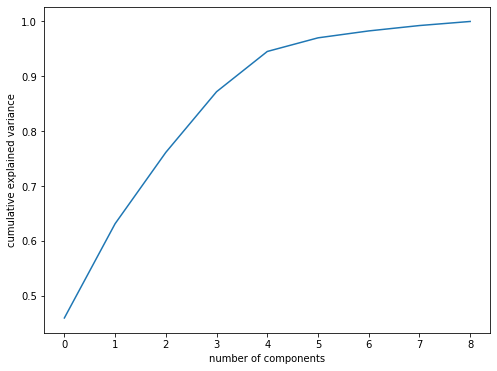

In [13]:
pca=PCA().fit(X_scaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

About 70% of variance in the data is explained by the first two principal components. 

Following the USA crime example in the notebook from class, see if you can plot the countries using the coordinates of their first two principal components. Does this make sense given your interpretation above? Does anything stand out? (Hint: The plot is a bit crowded with the text beside each point. It may be helpful to make a few plots with only 50 or so countries at a time to make it more readable.) 5 

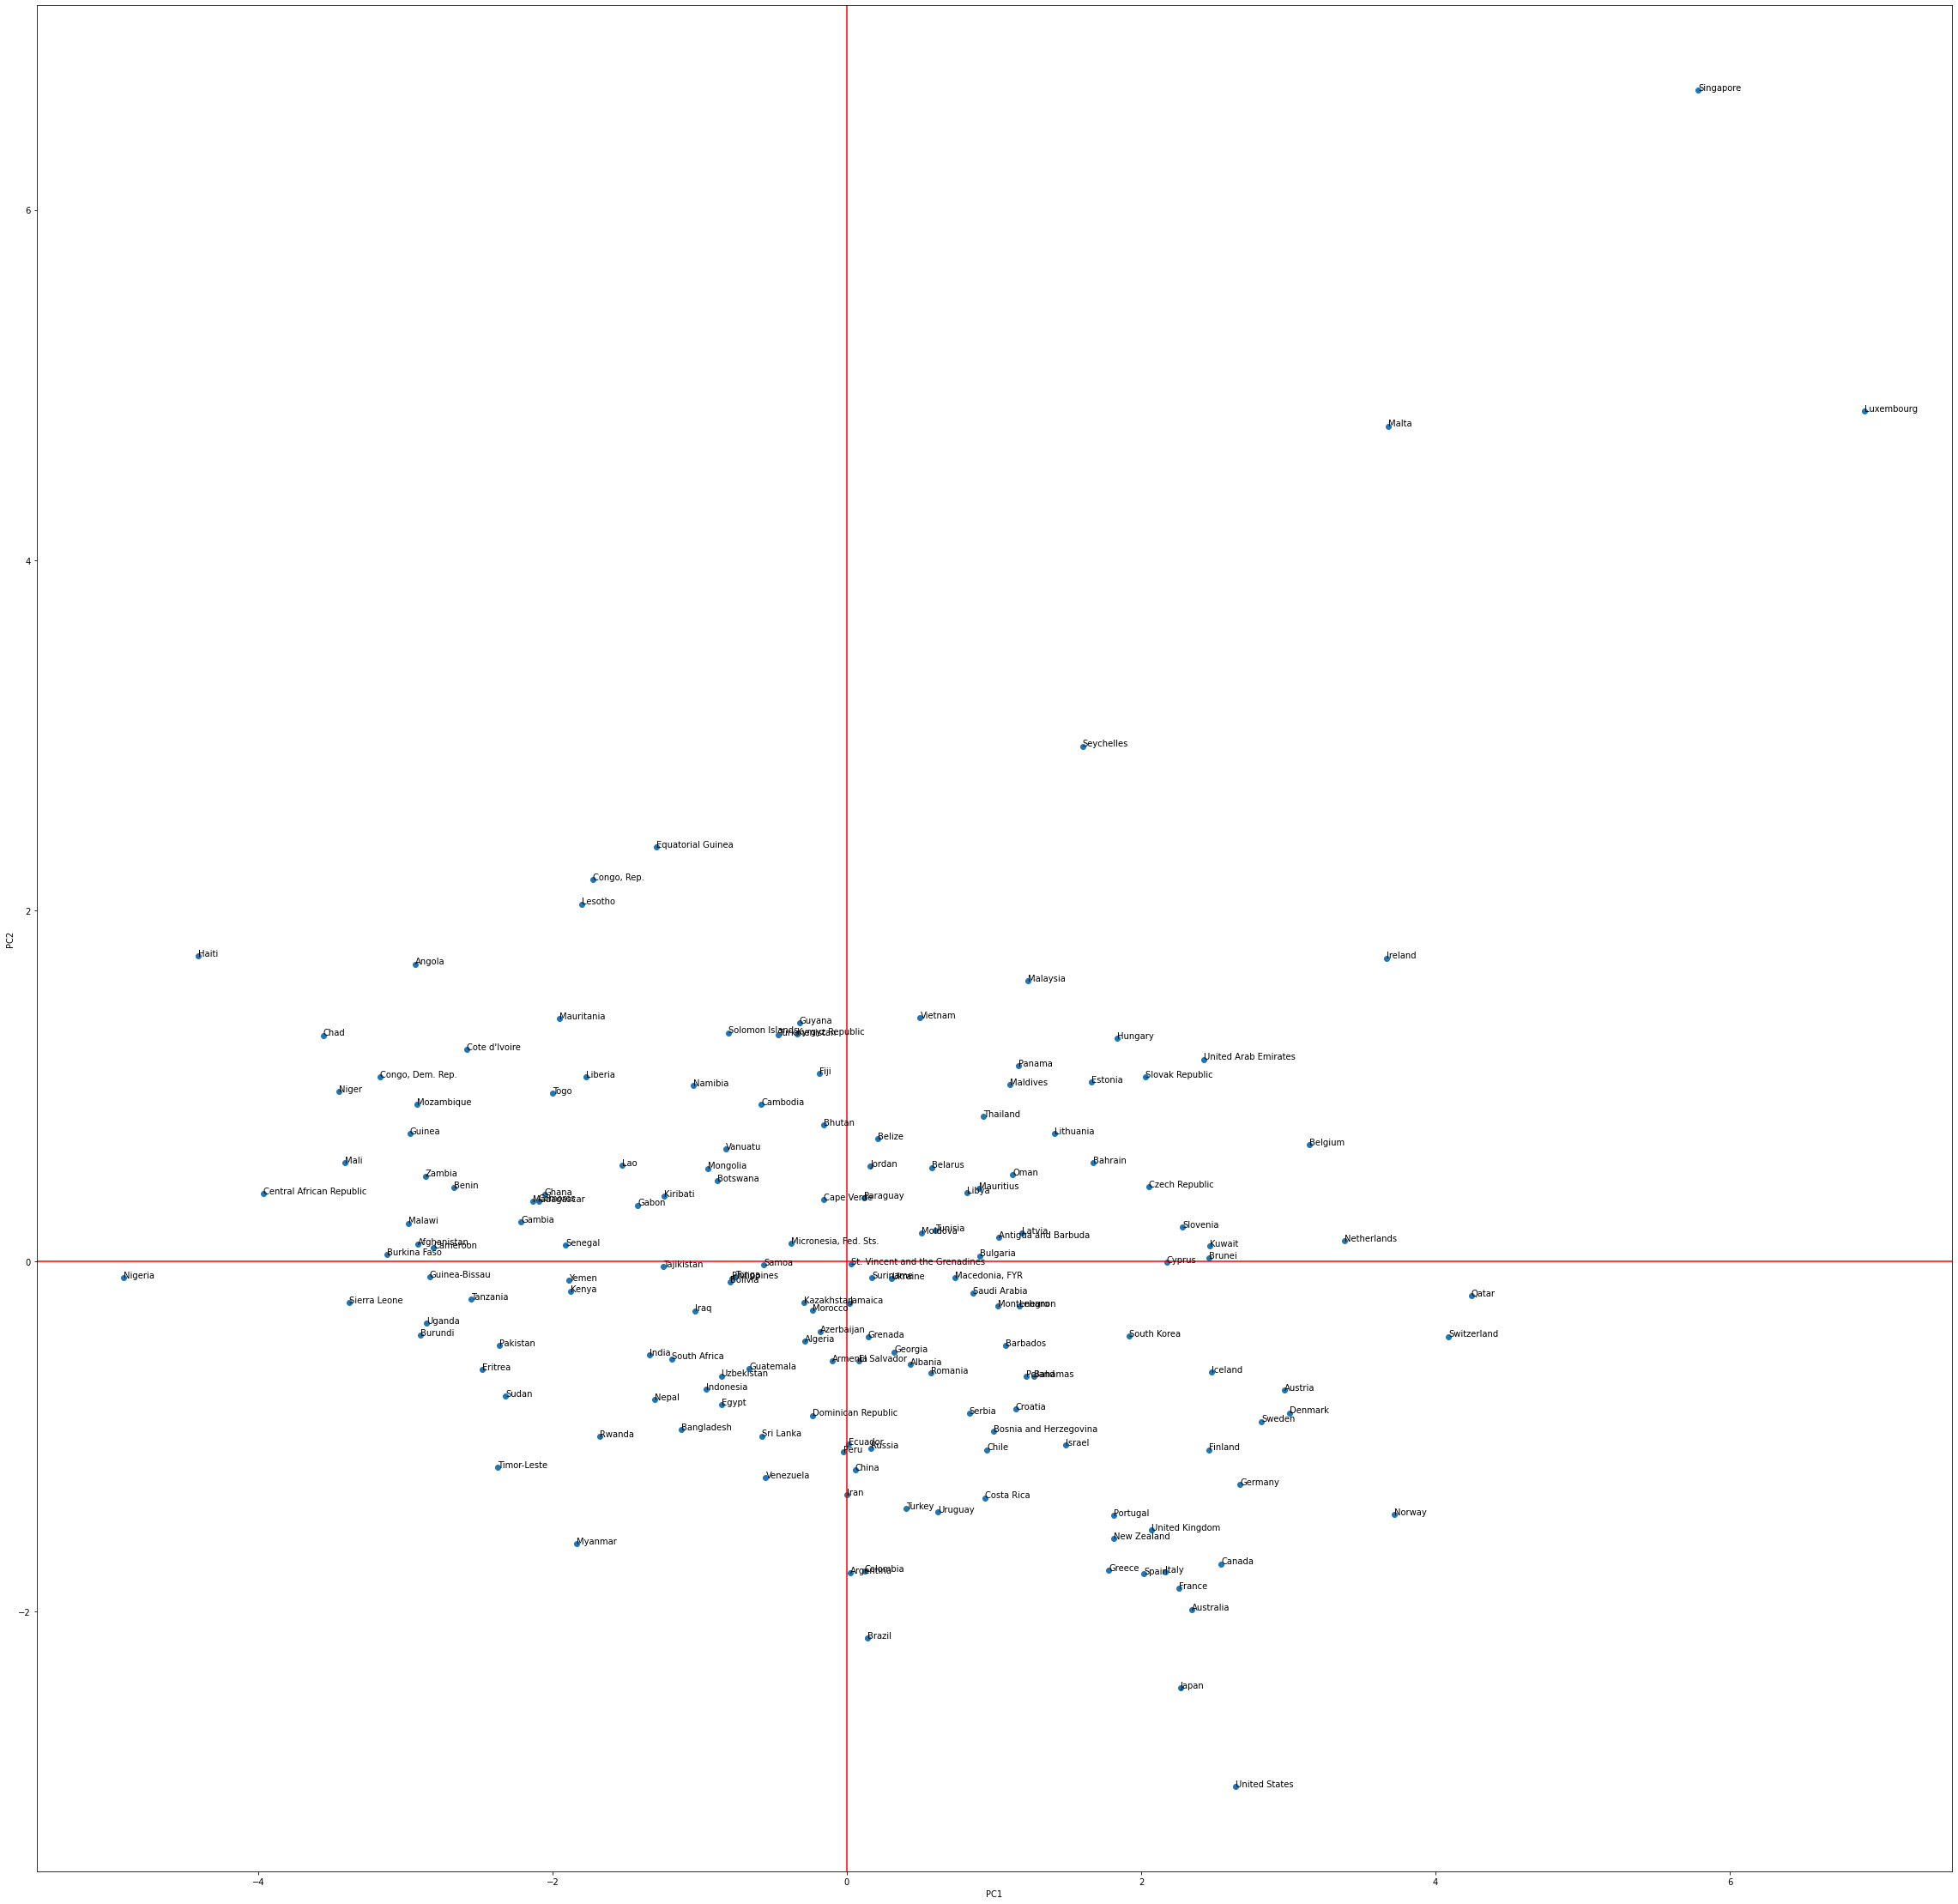

In [14]:
pca = PCA(2).fit_transform(X_scaled)
fig, ax = plt.subplots(figsize=(40,40))

plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')

xx=pca[:,0]
yy=pca[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2')

for i,txt in enumerate(y):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()    

What do these PCs mean/represent?

* Hard to interpret the graph of countries represented by PC. 
* PC1: high income, GDPP, exports and low mortality
* PC2: smaller population with higher mortaliy rates, smaller GDP

In [15]:
# TOP LEFT CORNER
cd_df.loc[cd_df['country'] == "Haiti"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


* Countries with hight mortality, inflation and low GDPP, income, exports, life expectancy are located in the top left quadrant.

In [16]:
# TOP RIGHT CORNER
cd_df.loc[cd_df['country'] == "Ireland"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.22,80.4,2.05,48700


* Countries with low mortality, inflation and high GDPP,income, exports, life expectancy are located in the top right quadrant.

In [17]:
# BOTTOM RIGHT CORNER
cd_df.loc[cd_df['country'] == "United States"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


* Countries with low mortality, inflation, exports, imports and high GDPP and income are located in the bottom right quadrant.

In [18]:
# BOTTOM LEFT CORNER
cd_df.loc[cd_df['country'] == "Myanmar"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988


* Countries with hight mortality, inflation and low exports, imports, GDPP and income are located in the bottom left quadrant.